In [ ]:
# Concept - SVM draws a hyper plane such that it maximies the margin between classification Group

In [ ]:
# Goal:
# To find the best hyperplane that separates the data into different classes.

In [17]:
import pandas as pd
from sklearn.datasets import load_iris 
Data=load_iris()
dir(Data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [19]:
Data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
Data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
df=pd.DataFrame(Data.data,columns=Data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df["Target"]=Data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df[df.Target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [39]:
df[df.Target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [43]:
df["TargetName"]=df.Target.apply(lambda x:Data.target_names[x] )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,TargetName
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [47]:
df[48:53]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,TargetName
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor


# Visualzation of Sepal length vs Sepal Width (Setosa vs Versicolor)

In [ ]:
# now we divide our dataframes in 3 Parts 

In [50]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

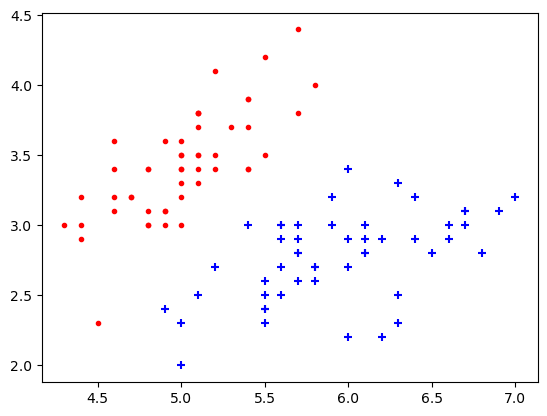

In [59]:
import matplotlib.pyplot as plt
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="red",marker='.')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue",marker='+')

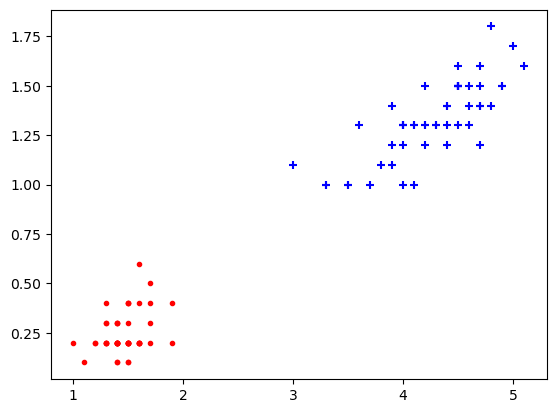

In [63]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="red",marker='.')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="blue",marker='+')

In [ ]:
# now time to split the dataset using train test split

In [67]:
from sklearn.model_selection import train_test_split
x=df.drop(['Target','TargetName'],axis='columns')
y=df.Target

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [73]:
len(X_train)

120

In [77]:
len(y_test)

30

# Time for implementing SVM algorithm 

In [80]:
from sklearn.svm import SVC
model = SVC()

In [82]:
model.fit(X_train, y_train)

SVC()

In [84]:
model.score(X_test, y_test)


1.0

<!-- HyperParameterTunning -->

# Hyperparameter Tunning

# 1. Regularization (C)

In [96]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [98]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

# Gamma

In [100]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

# Kernel

In [109]:
model_linear_kernal = SVC(kernel='rbf')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)


1.0

In [111]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)


1.0